# Descriptive and diagnostic analytics
The employees data is the data that we will use for this exercises.  We will apply descriptive and diagnostic analytics respectively. 

### Importing packages

In [233]:
# import all the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from scipy import stats
from scipy.stats import describe
from scipy.stats import chi2_contingency
from scipy.stats import norm
from scipy.stats import shapiro, anderson, kstest
import datetime
sns.set()

## Preparing data
- Acquiring data
- Loading and reading data
- Exploring data
- Understanding the data with different Pandas methods and properties such as:
    - ```head()```
    - ```tail()```
    - ```shape```
    - ```columns```
    - ```count()```
    - ```describe()```
    - ```describe(include='all')```
    - ```info()```
    - ```info(verbose=True)```
    - ```count()```

### Reading or loading data

In [234]:
# Data loading or reading
# Reading the employee.csv dataset as pandas dataframe

# df=pd.read_csv("/content/drive/MyDrive/employee.csv")
df = pd.read_csv('./data/employee.csv')

In [235]:
# Getting the first few rows or record of the dataframe, by default head display 5 rows
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [236]:
# Getting the last few rows or record of the dataframe, by default tail display 5 rows
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


In [237]:
'''
Provides number of rows and columns as tuple
We can understand that the emplyees.csv dataset has 1470 rows 35 columns
If we like to know the columns, we can use the columns properties
'''
df.shape

(1470, 35)

In [238]:
# The columns property gives all the columns in the dataframe as list.
# We can understand that the column names followed a CamelCase convention whereas snake_case is recommended in Python and Pandas
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### Renaming column names
- Snake case name convention is common both in Python and pandas. Therefore we can change the column names to a recommeded name

In [239]:
columns = ['age', 'attrition', 'business_travel', 'daily_rate', 'department',
       'distance_from_home', 'education', 'education_field', 'employee_count',
       'employee_number', 'environment_satisfaction', 'gender', 'hourly_rate',
       'job_involvement', 'job_level', 'job_role', 'job_satisfaction',
       'marital_status', 'monthly_income', 'monthly_rate', 'num_companies_worked',
       'over18', 'overtime', 'percent_salary_hike', 'performance_rating',
       'relationship_satisfaction', 'standard_hours', 'stock_option_level',
       'total_working_years', 'training_times_last_year', 'work_life_balance',
       'years_at_company', 'years_in_current_role', 'years_since_last_promotion',
       'years_with_curr_manager']
df.columns = columns

In [240]:
df.head()

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_count,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over18,overtime,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [241]:
# Counts the non-null values of each columns, somehow similar to info()
# The result shows that there is no missing value in all the records or rews
df.count()

age                           1470
attrition                     1470
business_travel               1470
daily_rate                    1470
department                    1470
distance_from_home            1470
education                     1470
education_field               1470
employee_count                1470
employee_number               1470
environment_satisfaction      1470
gender                        1470
hourly_rate                   1470
job_involvement               1470
job_level                     1470
job_role                      1470
job_satisfaction              1470
marital_status                1470
monthly_income                1470
monthly_rate                  1470
num_companies_worked          1470
over18                        1470
overtime                      1470
percent_salary_hike           1470
performance_rating            1470
relationship_satisfaction     1470
standard_hours                1470
stock_option_level            1470
total_working_years 

In [242]:
'''
provide information about the datafrmae, the column and the non-null count and data type of each row
the result shows that there is no missing value in the dataset
'''
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   age                         1470 non-null   int64 
 1   attrition                   1470 non-null   object
 2   business_travel             1470 non-null   object
 3   daily_rate                  1470 non-null   int64 
 4   department                  1470 non-null   object
 5   distance_from_home          1470 non-null   int64 
 6   education                   1470 non-null   int64 
 7   education_field             1470 non-null   object
 8   employee_count              1470 non-null   int64 
 9   employee_number             1470 non-null   int64 
 10  environment_satisfaction    1470 non-null   int64 
 11  gender                      1470 non-null   object
 12  hourly_rate                 1470 non-null   int64 
 13  job_involvement             1470 non-null   int6

In [243]:
# pd.options.display.max_rows=None, for big data to show all the data
# pd.options.display.max_columns=None

In [244]:
# The following method also show the total number of missing values in each row.
# The result shows that there is no missing values in the dataset
# Therefore we do not follow any approach to populate missing values
df.isnull().sum()

age                           0
attrition                     0
business_travel               0
daily_rate                    0
department                    0
distance_from_home            0
education                     0
education_field               0
employee_count                0
employee_number               0
environment_satisfaction      0
gender                        0
hourly_rate                   0
job_involvement               0
job_level                     0
job_role                      0
job_satisfaction              0
marital_status                0
monthly_income                0
monthly_rate                  0
num_companies_worked          0
over18                        0
overtime                      0
percent_salary_hike           0
performance_rating            0
relationship_satisfaction     0
standard_hours                0
stock_option_level            0
total_working_years           0
training_times_last_year      0
work_life_balance             0
years_at

## Descriptive Analytics

By default, the `describe()` method provides various descriptive statistics for quantitative data, including **count**, **mean**, **standard deviation**, **min**, **max**, and **quartiles**. These represent both **measures of central tendency** and **measures of variability**.

Descriptive analytics may include:
- Frequency table  
- Column chart (with *n* values)  
- Grouped frequency distribution  
- Histogram  
- Summary statistics  
- Data tables  
- Boxplot (with *n* values)  
- Column chart of averages across multiple variables  



In [245]:
# provide descriptive statistical values of a quantitative data
df.describe()

,age,daily_rate,distance_from_home,education,employee_count,employee_number,environment_satisfaction,hourly_rate,job_involvement,job_level,job_satisfaction,monthly_income,monthly_rate,num_companies_worked,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [246]:
# to display all the colulmns of
# pd.set_option('display.max_columns', 999)

In [247]:
# provide descriptive statistical values of both a quantitative and  categorical values
df.describe(include='all')

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_count,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over18,overtime,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,Y,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,NaN,882,NaN,NaN,NaN,326,NaN,673,NaN,NaN,NaN,1470,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,2.721769,NaN,65.891156,2.729932,2.063946,NaN,2.728571,NaN,6502.931293,14313.103401,2.693197,NaN,NaN,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,1.093082,NaN,20.329428,0.711561,1.106940,NaN,1.102846,NaN,4707.956783,7117.786044,2.498009,NaN,NaN,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,2094.000000,0.000000,NaN,NaN,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,2.000000,NaN,48.000000,2.000000,1.000000,NaN,2.000000,NaN,2911.000000,8047.000000,1.000000,NaN,NaN,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,3.000000,NaN,66.000000,3.000000,2.000000,NaN,3.000000,NaN,4919.000000,14235.500000,2.000000,NaN,NaN,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,4.000000,NaN,83.750000,3.000000,3.000000,NaN,4.000000,NaN,8379.000000,20461.500000,4.000000,NaN,NaN,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [248]:
df.describe()[['age', 'hourly_rate','monthly_income','education']]

,age,hourly_rate,monthly_income,education
count,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,65.891156,6502.931293,2.912925
std,9.135373,20.329428,4707.956783,1.024165
min,18.000000,30.000000,1009.000000,1.000000
25%,30.000000,48.000000,2911.000000,2.000000
50%,36.000000,66.000000,4919.000000,3.000000
75%,43.000000,83.750000,8379.000000,4.000000
max,60.000000,100.000000,19999.000000,5.000000


### Getting n number of large values


In [249]:
# the largest daily rate
df.nlargest(n=3, columns='daily_rate')


,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_count,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over18,overtime,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
427,60,No,Travel_Frequently,1499,Sales,28,3,Marketing,1,573,3,Female,80,2,3,Sales Executive,1,Married,10266,2845,4,Y,No,19,3,4,80,0,22,5,4,18,13,13,11
986,39,No,Travel_Rarely,1498,Sales,21,4,Life Sciences,1,1390,1,Male,44,2,2,Sales Executive,4,Married,6120,3567,3,Y,Yes,12,3,4,80,2,8,2,4,5,4,1,4
155,29,No,Non-Travel,1496,Research & Development,1,1,Technical Degree,1,208,4,Male,41,3,2,Manufacturing Director,3,Married,4319,26283,1,Y,No,13,3,1,80,1,10,1,3,10,7,0,9


In [250]:
# the seven large ages

df.nlargest(n=1, columns='age')

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_count,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over18,overtime,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
411,60,No,Travel_Rarely,422,Research & Development,7,3,Life Sciences,1,549,1,Female,41,3,5,Manager,1,Married,19566,3854,5,Y,No,11,3,4,80,0,33,5,1,29,8,11,10


In [251]:
departments = df[['department']].value_counts()
departments

department            
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

In [252]:
labels = [d[0] for d in list(departments.index)]
print(labels)

['Research & Development', 'Sales', 'Human Resources']


[961 446  63]


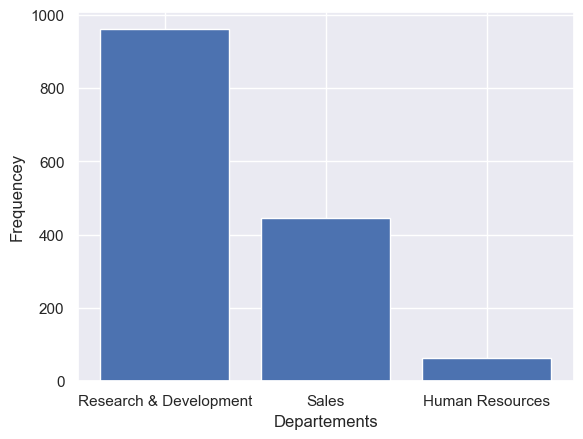

In [253]:
values = departments.values
print(values)

plt.bar(labels, list(values))
plt.xlabel('Departements')
plt.ylabel('Frequencey')
plt.show()

### Histogram

In this section, let's explore the shape of histograms for different properties. Evaluating the *class* or *type* of a histogram refers to identifying the underlying distribution of the data it represents. This can be approached through methods such as **visual inspection** and **statistical tests**.

**Visual Inspection**
- A bell-shaped curve may suggest a normal distribution.
- A skewed histogram might indicate a log-normal, exponential, or Poisson distribution.
- A flat or uniform-looking histogram could suggest a uniform distribution.

**Statistical Tests**
- **Shapiro-Wilk Test**: Assesses whether the data follows a normal distribution.
- **Anderson-Darling Test**: Another test for evaluating normality.
- **Kolmogorov-Smirnov Test**: Compares the sample data to a reference distribution (e.g., normal distribution).



In [254]:
# function to create a line in a histogram
def fit_to_normal_dist (data):
   #  Fit a normal distribution to the data and plot the PDF (probability density function)
    mu, std = stats.norm.fit(data)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, std)
    return x, p

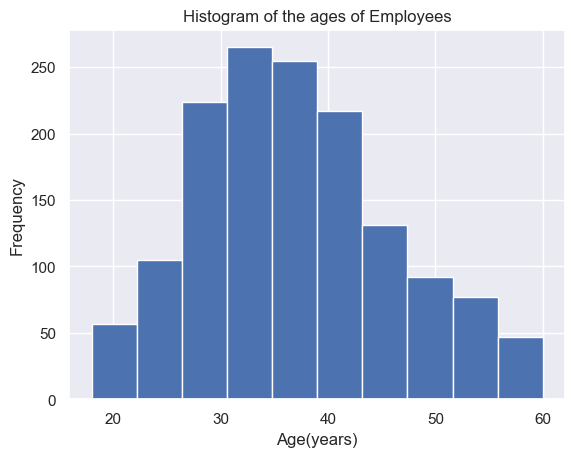

In [255]:
ages  = df['age']
plt.hist(ages, bins = 10)
plt.xlabel('Age(years)')
plt.ylabel('Frequency')
plt.title('Histogram of the ages of Employees')
plt.show()

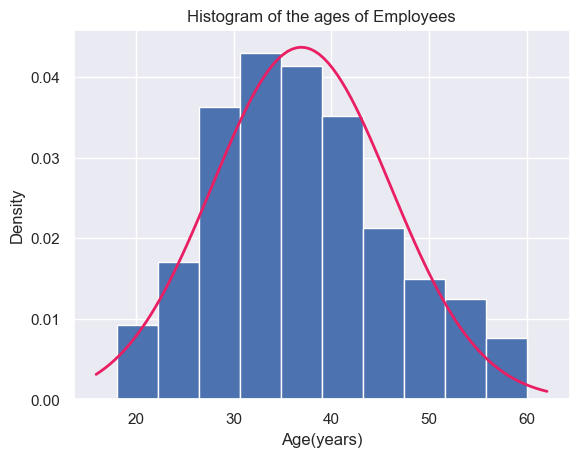

In [256]:
ages  = df['age']
plt.hist(ages, density = True, bins = 10)
plt.xlabel('Age(years)')
plt.ylabel('Density')
plt.title('Histogram of the ages of Employees')
x, p = fit_to_normal_dist (ages)
plt.plot(x, p, '#e91e63', linewidth=2)
plt.show()

The above histgram shape is close to a bell shape. We may say it is close to a bell shape which is a normal distribution shape.

In [257]:
# Shapiro-Wilk Test for normality

# Perform the Shapiro-Wilk test to check if the data follows a normal distribution
print("Shapiro-Wilk Test for Normality:")

# Perform the Shapiro-Wilk test on 'ages' data
stat_sw, p_value_sw = shapiro(ages)

# Display the Shapiro-Wilk test statistic and p-value
print(f"Test Statistic: {stat_sw:.4f}, p-value: {p_value_sw:.4f}")

# Interpretation of the test result based on the p-value
# If p-value < 0.05, we reject the null hypothesis (H0) and conclude the data is not normally distributed
# If p-value >= 0.05, we fail to reject the null hypothesis and conclude the data is likely normally distributed
if p_value_sw < 0.05:
    print("The p-value is less than 0.05, so we reject the null hypothesis (H0).")
    print("This suggests the data is likely not normally distributed.")
else:
    print("The p-value is greater than or equal to 0.05, so we fail to reject the null hypothesis (H0).")
    print("This suggests the data is likely normally distributed.")

print()  # Adds a blank line after the test results

Shapiro-Wilk Test for Normality:
Test Statistic: 0.9774, p-value: 0.0000
The p-value is less than 0.05, so we reject the null hypothesis (H0).
This suggests the data is likely not normally distributed.



In [258]:
# Kolmogorov-Smirnov Test
print("Kolmogorov-Smirnov Test:")
stat_ks, p_value_ks = kstest(ages, 'norm')
print(f"Kolmogorov-Smirnov Test Statistic: {stat_ks:.4f}, p-value: {p_value_ks:.4f}")
if p_value_ks < 0.05:
    print("The data is likely not from a normal distribution (reject H0).")
else:
    print("The data is likely from a normal distribution (fail to reject H0).")

Kolmogorov-Smirnov Test:
Kolmogorov-Smirnov Test Statistic: 1.0000, p-value: 0.0000
The data is likely not from a normal distribution (reject H0).


In [259]:
# Anderson-Darling Test
print("Anderson-Darling Test:")
result_ad = anderson(ages)
print(f"Anderson-Darling Test Statistic: {result_ad.statistic:.4f}")
print("Critical values:")
for i, cv in enumerate(result_ad.critical_values):
    sig_level = ["15%", "10%", "5%", "2.5%", "1%"][i]
    print(f"{sig_level}: {cv:.4f}")
if result_ad.statistic < result_ad.critical_values[-1]:
    print("The data is likely normally distributed (fail to reject H0).")
else:
    print("The data is likely not normally distributed (reject H0).")
print()

Anderson-Darling Test:
Anderson-Darling Test Statistic: 9.9686
Critical values:
15%: 0.5740
10%: 0.6540
5%: 0.7850
2.5%: 0.9160
1%: 1.0890
The data is likely not normally distributed (reject H0).



The histograph seems a normal distribution but different statistical test methods test result does proved that it is not a normal distribution.

### Filtering data
- We can filter data based on different methods. We can filter out the the female or male data part using boolean indexing

In [260]:
# Employees under 30 years old
df_under_30 = df[df['age'] < 30]
df_under_30.head()

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_count,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over18,overtime,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
11,29,No,Travel_Rarely,153,Research & Development,15,2,Life Sciences,1,15,4,Female,49,2,2,Laboratory Technician,3,Single,4193,12682,0,Y,Yes,12,3,4,80,0,10,3,3,9,5,0,8
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,19,3,Male,50,2,1,Laboratory Technician,3,Single,2028,12947,5,Y,Yes,14,3,2,80,0,6,4,3,4,2,0,3
15,29,No,Travel_Rarely,1389,Research & Development,21,4,Life Sciences,1,20,2,Female,51,4,3,Manufacturing Director,1,Divorced,9980,10195,1,Y,No,11,3,3,80,1,10,1,3,10,9,8,8
17,22,No,Non-Travel,1123,Research & Development,16,2,Medical,1,22,4,Male,96,4,1,Laboratory Technician,4,Divorced,2935,7324,1,Y,Yes,13,3,2,80,2,1,2,2,1,0,0,0


In [261]:
df_under_30.shape

(326, 35)

In [262]:
rows, _ = df_under_30.shape
print(rows)

326


In [263]:
# Percentage of under 30
df_above_50 = df[df['age'] >= 50]
print(len(df_above_50))
total_rows, _ = df.shape
rows_above_50, _ = df_above_50.shape

percentage = (rows_above_50 / total_rows) * 100
print(f'The precentage of employees under 50 are {round(percentage, 2)} %')
print(f'The precentage of employees 50 and above are {round(100 - percentage, 2)} %')

173
The precentage of employees under 50 are 11.77 %
The precentage of employees 50 and above are 88.23 %


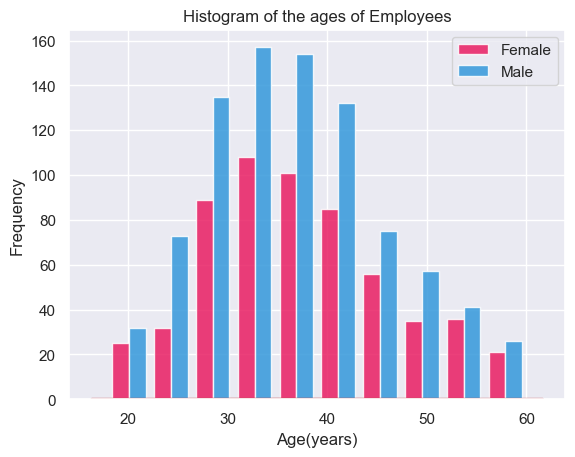

In [264]:
female = df[df['gender'] == 'Female']['age']
male = df[df['gender'] == 'Male']['age']
plt.hist([female, male], bins=10, alpha = 0.85, label = ['Female', 'Male'], color =['#e91e63', '#3498db'])
# plt.hist(male, bins=25, alpha=0.45, color='blue')
plt.xlabel('Age(years)')
plt.ylabel('Frequency')
plt.title('Histogram of the ages of Employees')
plt.legend(['Female','Male'])

# Plot the normal distribution line
x,p = fit_to_normal_dist(male)
plt.plot(x, p, 'r', linewidth=2)
plt.show()

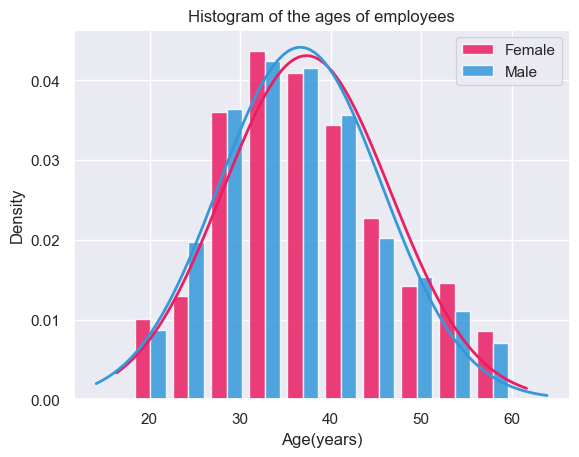

In [265]:
female = df[df['gender'] == 'Female']['age']
male = df[df['gender'] == 'Male']['age']
plt.hist([female,male], bins=10, density = True, alpha = 0.85, label = ['Female', 'Male'], color =['#e91e63', '#3498db'])
# plt.hist(male, bins=25, alpha=0.45, color='blue')
plt.xlabel('Age(years)')
plt.ylabel('Density')
plt.title('Histogram of the ages of employees')
plt.legend(['Female','Male'])

#  Fit a normal distribution to the data and plot the PDF (probability density function)
x, p = fit_to_normal_dist(female)
plt.plot(x, p, '#e91e63', linewidth=2)

x, p = fit_to_normal_dist(male)
plt.plot(x, p, '#3498db', linewidth=2)
plt.show()


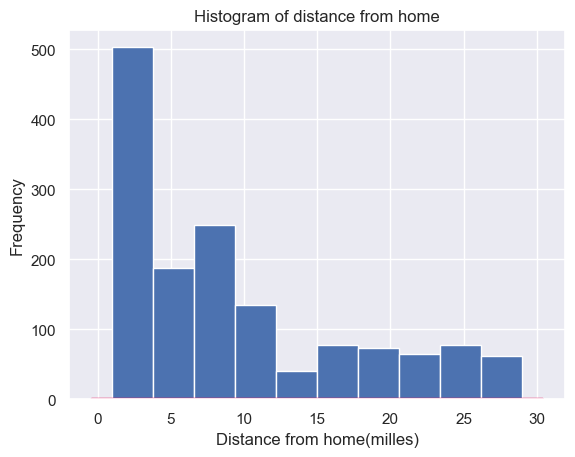

In [266]:
distance_from_home  = df['distance_from_home']
plt.hist(distance_from_home, bins = 10)
plt.xlabel('Distance from home(milles)')
plt.ylabel('Frequency')
plt.title('Histogram of distance from home')
x, p = fit_to_normal_dist (distance_from_home)
plt.plot(x, p, '#e91e63', linewidth=2)
plt.show()

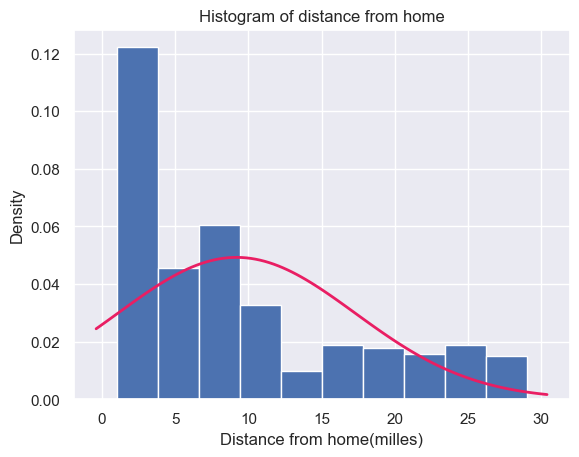

In [267]:
distance_from_home  = df['distance_from_home']
plt.hist(distance_from_home,density=True, bins = 10)
plt.xlabel('Distance from home(milles)')
plt.ylabel('Density')
plt.title('Histogram of distance from home')
x, p = fit_to_normal_dist (distance_from_home)
plt.plot(x, p, '#e91e63', linewidth=2)
plt.show()

The histogram of distance from home skewed to the right which means the majority employee closer to the company.

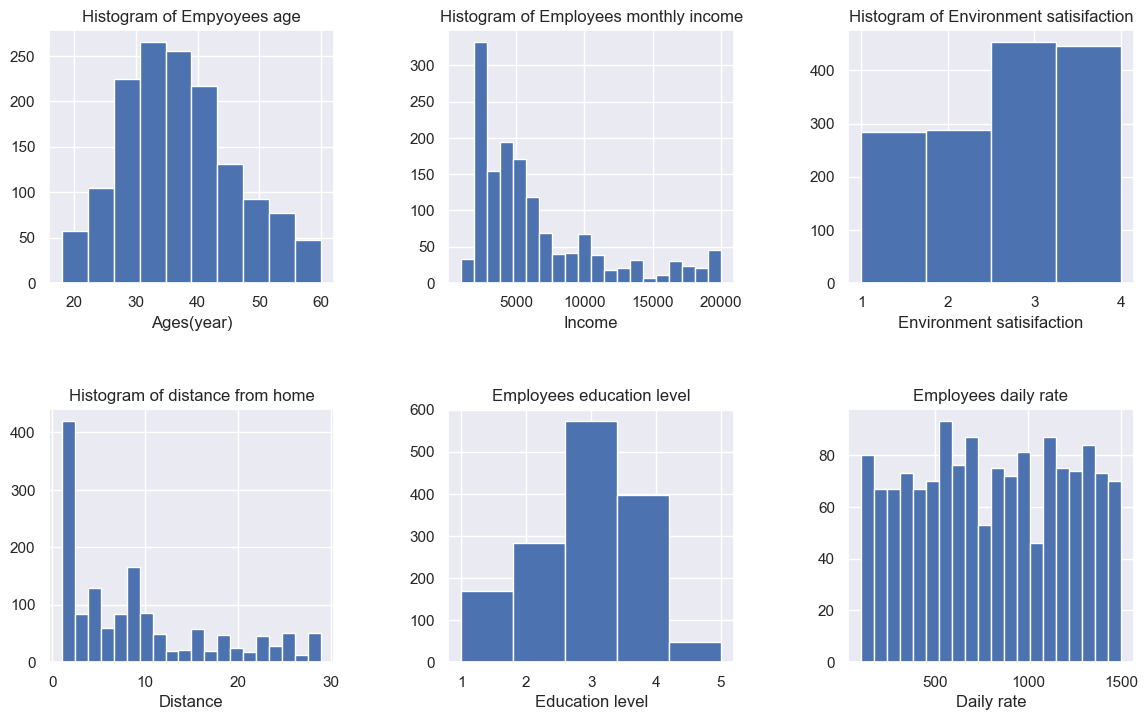

In [268]:
fg, axes = plt.subplots(2, 3, figsize = (14, 8))
df['age'].hist(ax=axes[0, 0], bins = 10)
axes[0, 0].set_title('Histogram of Empyoyees age')
axes[0, 0].set_xlabel('Ages(year)')

df['monthly_income'].hist(ax=axes[0, 1], bins = 20)
axes[0, 1].set_title('Histogram of Employees monthly income')
axes[0, 1].set_xlabel('Income')

df['environment_satisfaction'].hist(ax=axes[0, 2], bins = 4)
axes[0, 2].set_title('Histogram of Environment satisifaction')
axes[0, 2].set_xlabel('Environment satisifaction')

df['distance_from_home'].hist(ax=axes[1, 0], bins = 20)
axes[1, 0].set_title('Histogram of distance from home')
axes[1, 0].set_xlabel('Distance')

df['education'].hist(ax=axes[1, 1], bins = 5)
axes[1, 1].set_title('Employees education level')
axes[1, 1].set_xlabel('Education level')

df['daily_rate'].hist(ax=axes[1, 2], bins = 20)
axes[1, 2].set_title('Employees daily rate')
axes[1, 2].set_xlabel('Daily rate')
# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.5, top=0.88, bottom=0.09)
plt.show()

Based on a visual inspection the age and education are close to normal distribution. However, the monthly income and distance from home are skewed to the right. Daily income show a a uniform distribution. The environmental satisfaction screwed to the left.

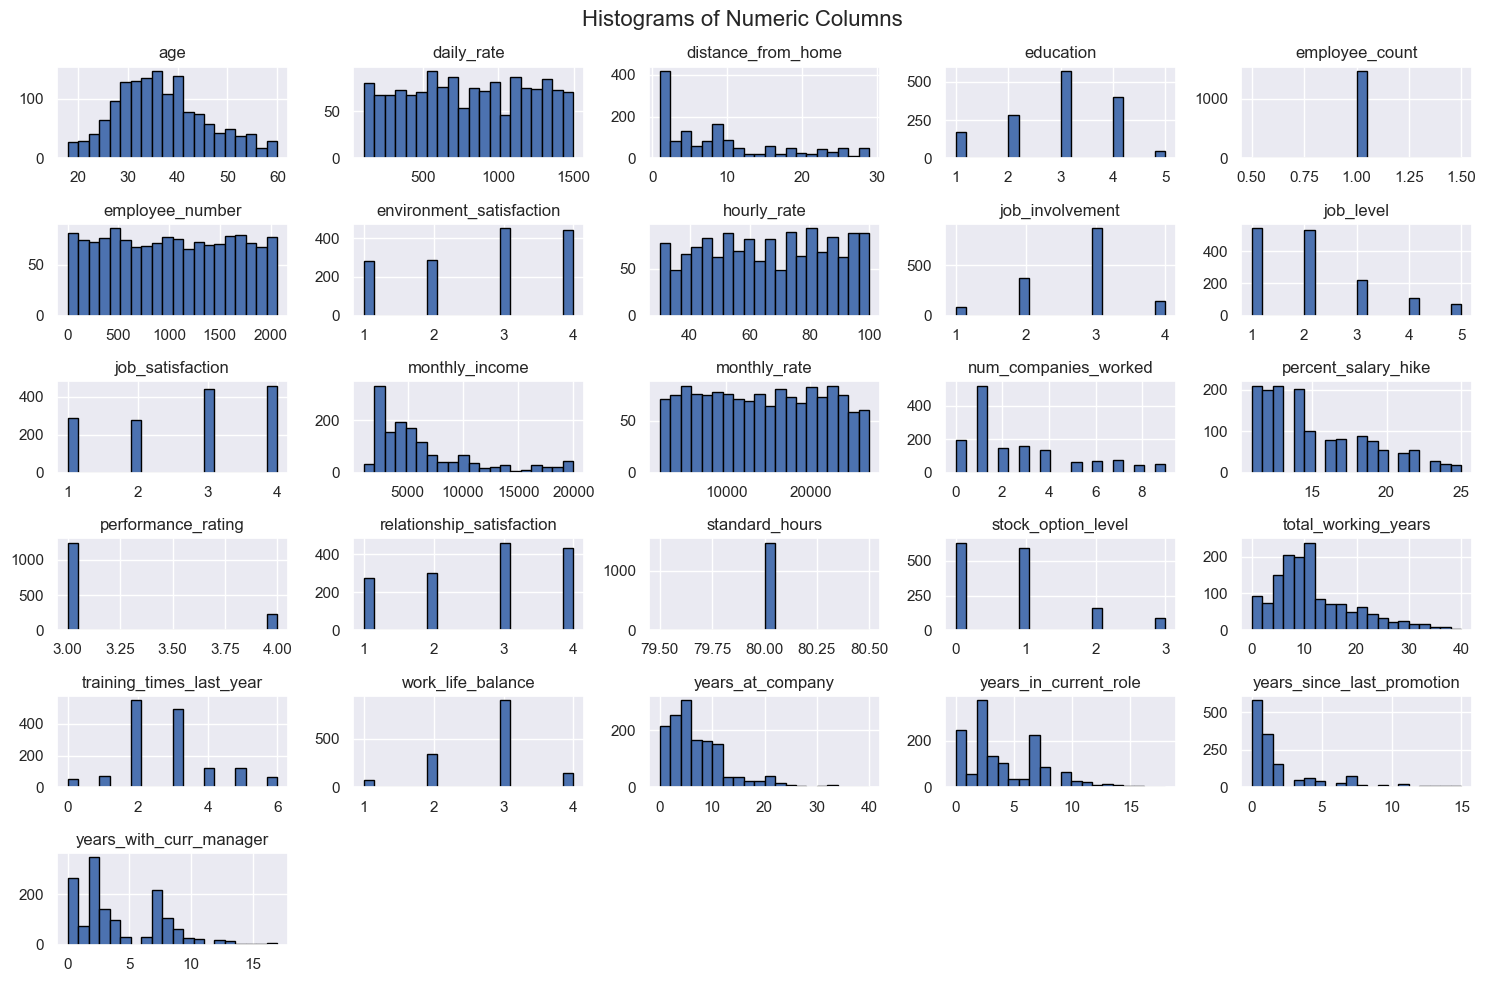

In [269]:
df.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Numeric Columns', fontsize=16)
plt.tight_layout()
plt.show()

In [270]:
# group income
df.describe()['monthly_income']

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: monthly_income, dtype: float64

In [271]:
# Creating a fequency table using a income range

boundaries = range(1000, 20001, 1000)

### Add a column for salary level to the data
### Parameter for bins is the abovedefined list named boundaries

df['income_group'] = pd.cut(df['monthly_income'], bins = boundaries)
df_income = pd.crosstab(df['income_group'], 'Count')
### Add percentages

n = df_income['Count'].sum()
print(n)
df_income['Percent'] = df_income/ n * 100

df_income.index = df_income.index.astype(str)
df_income.style.format({'Count' : '{:.0f}', 'Percent' : '{:.1f} %'})

1470


col_0,Count,Percent
income_group,,
"(1000, 2000]",33,2.2 %
"(2000, 3000]",362,24.6 %
"(3000, 4000]",148,10.1 %
"(4000, 5000]",206,14.0 %
"(5000, 6000]",165,11.2 %
"(6000, 7000]",121,8.2 %
"(7000, 8000]",54,3.7 %
"(8000, 9000]",48,3.3 %
"(9000, 10000]",52,3.5 %


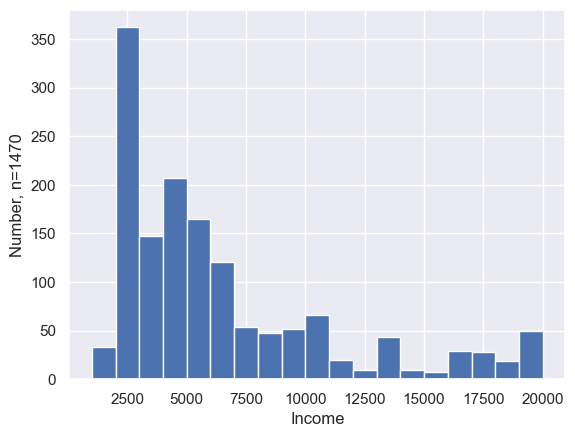

In [272]:
df['monthly_income'].hist(bins = boundaries)

### Chart axes definitions

plt.xlabel('Income')
plt.ylabel('Number, n=' + str(n))
plt.show()

### Group by and Sort by

In [273]:
df_income = df.groupby('gender')['monthly_income'].describe()
df_income.columns = ['Count', 'Mean', 'Standard deviation', 'Minimum', 'Lower quartile', 'Median', 'Upper quartile', 'Maximum']
df_income.T.style.format('{:.0f}')

gender,Female,Male
Count,588,882
Mean,6687,6381
Standard deviation,4696,4715
Minimum,1129,1009
Lower quartile,3037,2820
Median,5082,4838
Upper quartile,8712,8114
Maximum,19973,19999


In [274]:
df[['age', 'hourly_rate', 'monthly_income', 'employee_number', 'daily_rate','distance_from_home' ]].describe().sort_values(by='mean', axis = 1, ascending = False)

,monthly_income,employee_number,daily_rate,hourly_rate,age,distance_from_home
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,6502.931293,1024.865306,802.485714,65.891156,36.923810,9.192517
std,4707.956783,602.024335,403.509100,20.329428,9.135373,8.106864
min,1009.000000,1.000000,102.000000,30.000000,18.000000,1.000000
25%,2911.000000,491.250000,465.000000,48.000000,30.000000,2.000000
50%,4919.000000,1020.500000,802.000000,66.000000,36.000000,7.000000
75%,8379.000000,1555.750000,1157.000000,83.750000,43.000000,14.000000
max,19999.000000,2068.000000,1499.000000,100.000000,60.000000,29.000000


In [304]:
# limits=[15, 20, 25, 30, 35, 40, 45, 50, 55, 60]

df['age_group']=pd.cut(df['age'], bins= range(15, 61, 5))

# Classification of variables
df_age_group = df.groupby('age_group', observed=False).size().reset_index(name='Count').sort_values(by='Count')
n = df_age_group['Count'].sum()
print(n)
df_age_group['Percent'] =df_age_group['Count']/ n * 100
df_age_group.style.format({'Count' : '{:.0f}', 'Percent' : '{:.1f} %'})


1470


,age_group,Count,Percent
0,"(15, 20]",28,1.9 %
8,"(55, 60]",47,3.2 %
1,"(20, 25]",95,6.5 %
7,"(50, 55]",96,6.5 %
6,"(45, 50]",130,8.8 %
5,"(40, 45]",192,13.1 %
2,"(25, 30]",263,17.9 %
4,"(35, 40]",276,18.8 %
3,"(30, 35]",343,23.3 %


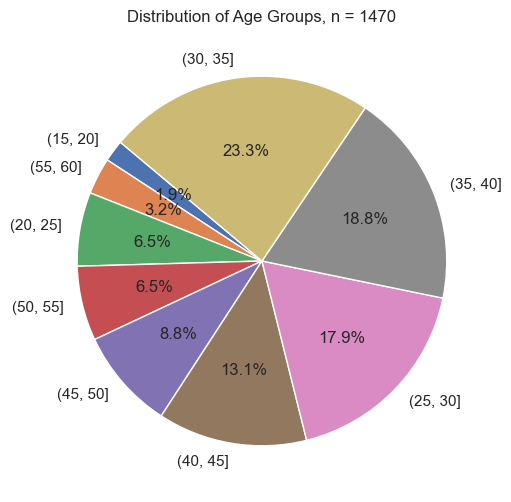

In [305]:
plt.figure(figsize=(8, 6))
plt.pie(df_age_group['Count'], labels=df_age_group['age_group'], autopct='%1.1f%%', startangle=140)
plt.title(f'Distribution of Age Groups, n = {df_age_group["Count"].sum()}')
plt.show()

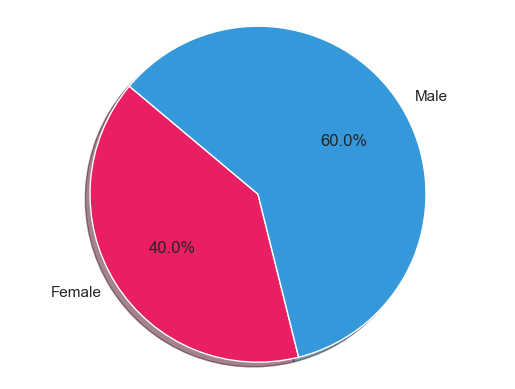

In [306]:
df_gender_distribution = df.groupby('gender').size()
labels = list(df_gender_distribution.index)
sizes = list(df_gender_distribution.values)
plt.pie(sizes, labels=labels,
        autopct='%1.1f%%', shadow=True, startangle=140, colors =  ['#e91e63', '#3498db'])
plt.axis('equal')
plt.show()

1470


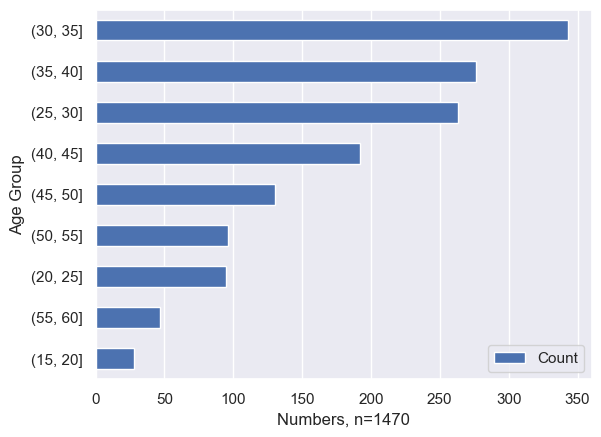

In [307]:
n = df_age_group['Count'].sum()
print(n)
x = list(df_age_group['age_group'])
y = list(df_age_group['Count'])
df_age_group.plot.barh(x = 'age_group', y ='Count')

plt.xlabel(f'Numbers, n={n}')
plt.ylabel('Age Group')
plt.grid(axis = 'y')

## Diagnostic Analytics
- **Scatter Plot**: A graphical representation of the relationship between two variables. It helps identify trends, patterns, and outliers.
- **Cross Tabulation**: A method of analyzing the relationship between two or more categorical variables by creating contingency tables.
- **Correlation Coefficient**: A statistical measure that describes the strength and direction of a relationship between two variables (e.g., Pearson’s correlation coefficient).
- **Comparison of Statistical Measures**: This involves comparing measures such as mean, median, and standard deviation across different groups to understand how they differ.


### Scatter Plot

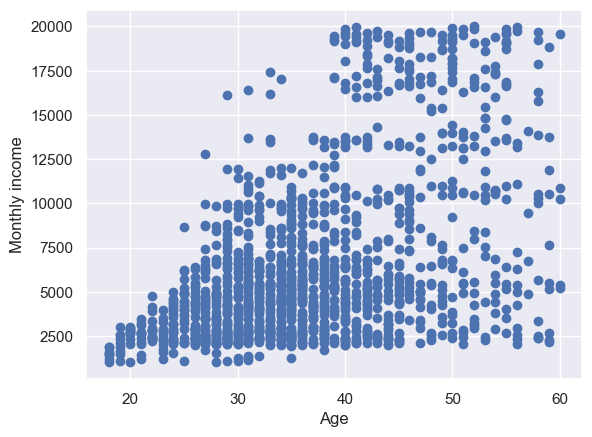

In [308]:
age = df['age']
income = df['monthly_income']
plt.scatter(age, income)
plt.xlabel('Age')
plt.ylabel('Monthly income')
plt.show()

The is a strong relationship between monthly income and age upto 45 years

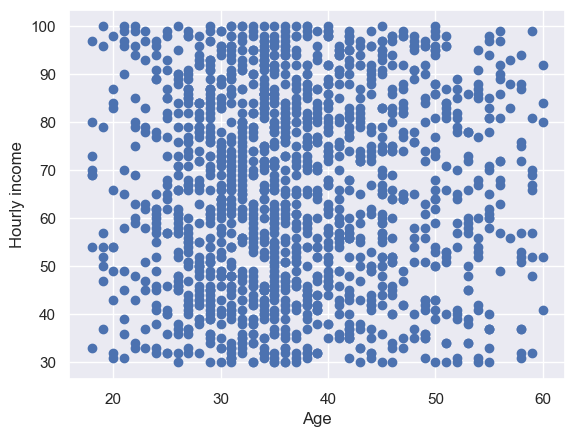

In [309]:
age = df['age']
income = df['hourly_rate']
plt.xlabel('Age')
plt.ylabel('Hourly income')
plt.scatter(age, income)
plt.show()

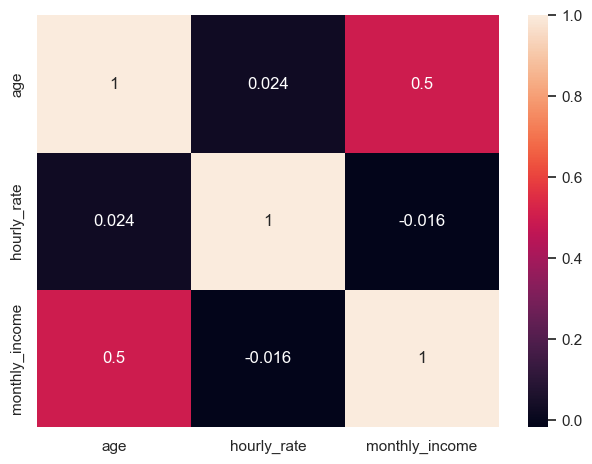

In [310]:
corr = df[['age','hourly_rate','monthly_income']].corr()
sns.heatmap(corr, annot=True)
plt.tight_layout()
plt.show()

Based on the scatter plot and correlation cofficient, age is positively correlated with monthly income

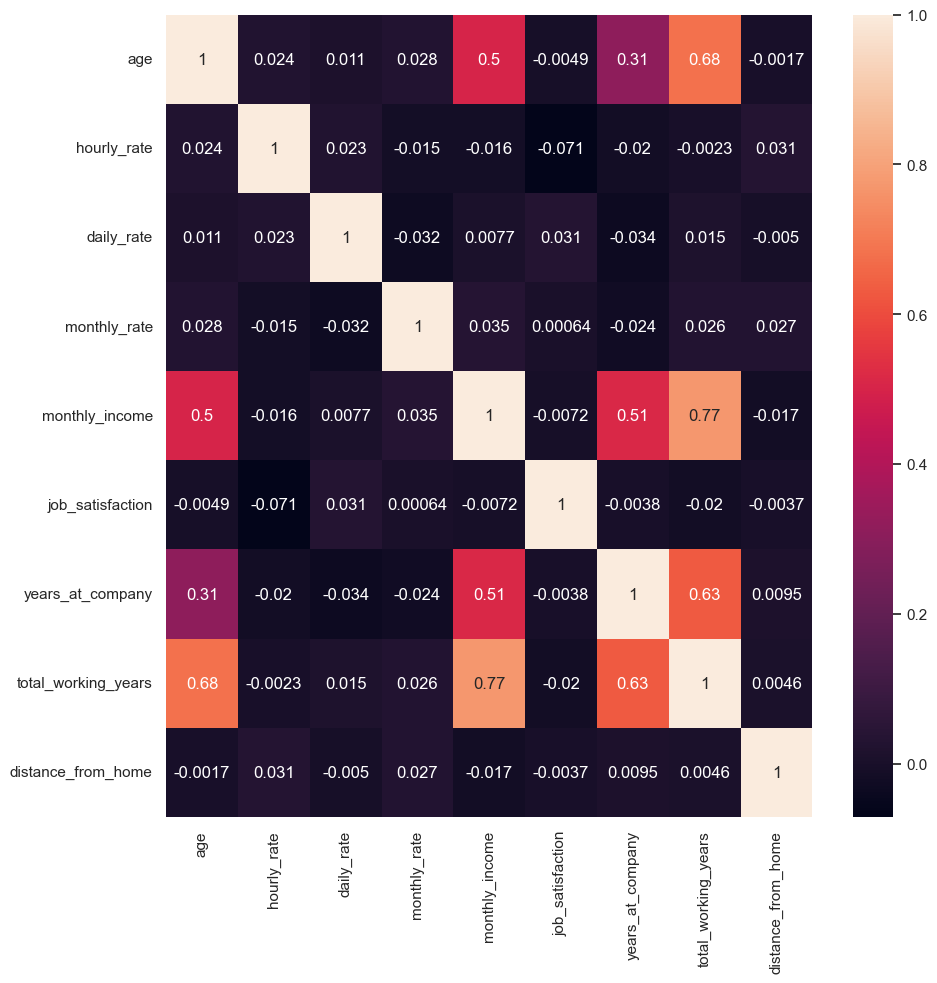

In [311]:
df_for_corr = df[['age', 'hourly_rate', 'daily_rate', 'monthly_rate', 'monthly_income', 'job_satisfaction',
             'years_at_company',  'total_working_years',
             'distance_from_home']]

plt.subplots(figsize=(10,10))
sns.heatmap(df_for_corr.corr(), annot=True)
plt.tight_layout()
plt.show()

The monthly income is highly related with the total working years in the company

### Cross Tabulation

In [312]:
df_age = pd.crosstab(df['age_group'], df['gender'])
df_age

gender,Female,Male
age_group,,
"(15, 20]",14,14
"(20, 25]",29,66
"(25, 30]",103,160
"(30, 35]",135,208
"(35, 40]",114,162
"(40, 45]",72,120
"(45, 50]",57,73
"(50, 55]",43,53
"(55, 60]",21,26


In [315]:
df_age = pd.crosstab(df['age_group'], df['gender'], normalize = 'columns') * 100
df_age.index.rename('Age group', inplace=True)
df_age.style.format('{:.1f} %')

gender,Female,Male
Age group,,
"(15, 20]",2.4 %,1.6 %
"(20, 25]",4.9 %,7.5 %
"(25, 30]",17.5 %,18.1 %
"(30, 35]",23.0 %,23.6 %
"(35, 40]",19.4 %,18.4 %
"(40, 45]",12.2 %,13.6 %
"(45, 50]",9.7 %,8.3 %
"(50, 55]",7.3 %,6.0 %
"(55, 60]",3.6 %,2.9 %


In [316]:
# df[['Gender', 'EducationField','BusinessTravel', 'Department']].group(by='Gender'
df['education_field'].values

array(['Life Sciences', 'Life Sciences', 'Other', ..., 'Life Sciences',
       'Medical', 'Medical'], dtype=object)

In [317]:
df_education = pd.crosstab(df['education_field'], df['gender'])
df_education.index.rename('Education', inplace=True)
df_education

gender,Female,Male
Education,,
Human Resources,8,19
Life Sciences,240,366
Marketing,69,90
Medical,190,274
Other,29,53
Technical Degree,52,80


In [319]:
df_education  = pd.crosstab(df['education_field'], df['gender'], normalize ='columns') * 100
df_education.index.rename('Education', inplace=True)
df_education.style.format('{:.1f} %')

gender,Female,Male
Education,,
Human Resources,1.4 %,2.2 %
Life Sciences,40.8 %,41.5 %
Marketing,11.7 %,10.2 %
Medical,32.3 %,31.1 %
Other,4.9 %,6.0 %
Technical Degree,8.8 %,9.1 %


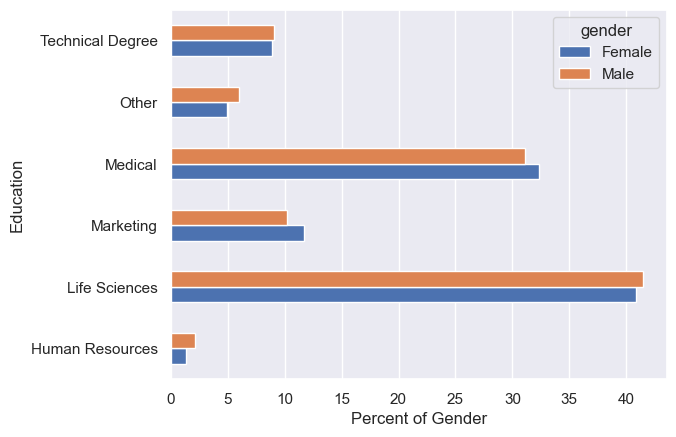

In [320]:
df_education.plot.barh()
plt.xlabel('Percent of Gender')
plt.grid(axis = 'y')

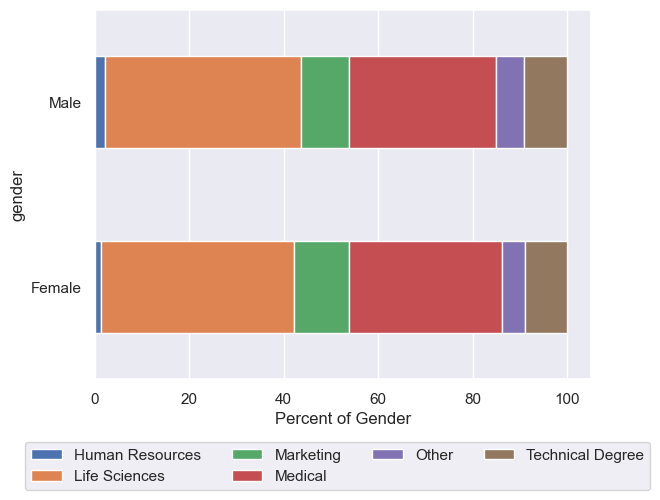

In [321]:
df_education.T.plot.barh(stacked=True)
plt.xlabel('Percent of Gender')
plt.legend(loc=(-0.14, -0.30), ncol = 4)
plt.grid(axis = 'y')

In [ ]:
df_business_travel = pd.crosstab(df['business_travel'], df['gender'])
df_business_travel

gender,Female,Male
business_travel,,
Non-Travel,49,101
Travel_Frequently,117,160
Travel_Rarely,422,621


In [ ]:
df_business_travel = pd.crosstab(df['business_travel'], df['gender'],  normalize ='columns') * 100
df_business_travel.style.format('{:.1f} %')

gender,Female,Male
business_travel,,
Non-Travel,8.3 %,11.5 %
Travel_Frequently,19.9 %,18.1 %
Travel_Rarely,71.8 %,70.4 %


In [ ]:

df_department = pd.crosstab(df['department'], df['gender'])
df_department

gender,Female,Male
department,,
Human Resources,20,43
Research & Development,379,582
Sales,189,257


In [ ]:
df_department = pd.crosstab(df['department'], df['gender'], normalize = 'columns') * 100
df_department.style.format('{:.1f} %')

gender,Female,Male
department,,
Human Resources,3.4 %,4.9 %
Research & Development,64.5 %,66.0 %
Sales,32.1 %,29.1 %


In [ ]:
df.groupby('education_field')['monthly_income'].describe()


,count,mean,std,min,25%,50%,75%,max
education_field,,,,,,,,
Human Resources,27.0,7241.148148,6444.154499,1555.0,2463.50,3886.0,8190.00,19636.0
Life Sciences,606.0,6463.288779,4715.485900,1051.0,2865.25,4943.0,8143.75,19999.0
Marketing,159.0,7348.584906,4204.250368,1675.0,4591.00,6118.0,9259.50,19845.0
Medical,464.0,6510.036638,4906.371796,1009.0,2815.25,4722.0,8401.50,19859.0
Other,82.0,6071.548780,4481.234203,1951.0,3075.00,4561.0,6924.25,19613.0
Technical Degree,132.0,5758.303030,4139.770625,1091.0,2583.50,4318.0,7165.25,19943.0


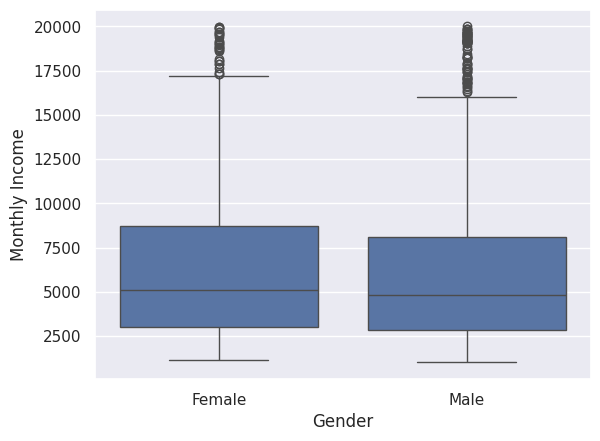

In [ ]:
sns.boxplot(data = df, x = 'gender', y = 'monthly_income')
plt.ylabel('Monthly Income')
plt.xlabel('Gender')
plt.show()

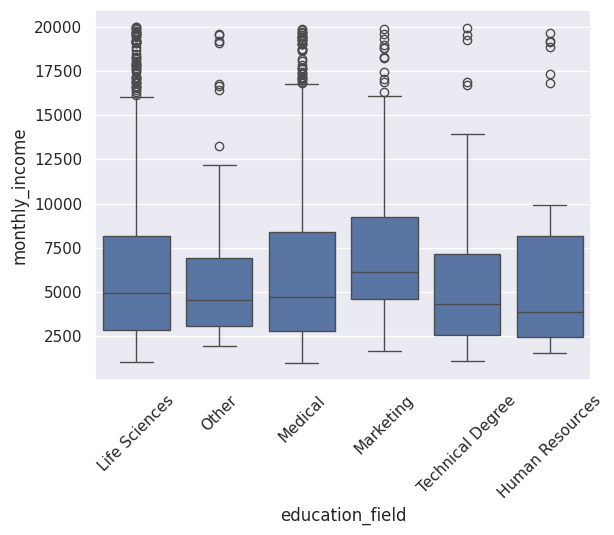

In [ ]:
sns.boxplot(data = df, x = 'education_field', y = 'monthly_income')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df_education = pd.crosstab(df['education'], df['gender'], normalize = 'columns') * 100
df_education.style.format('{:.1f} %')

gender,Female,Male
education,,
1,10.2 %,12.5 %
2,19.9 %,18.7 %
3,40.0 %,38.2 %
4,26.2 %,27.7 %
5,3.7 %,2.9 %


In [ ]:
df_education_field= pd.crosstab(df['education_field'], df['gender'], normalize = 'columns') * 100
df_education_field.style.format('{:.1f} %')

gender,Female,Male
education_field,,
Human Resources,1.4 %,2.2 %
Life Sciences,40.8 %,41.5 %
Marketing,11.7 %,10.2 %
Medical,32.3 %,31.1 %
Other,4.9 %,6.0 %
Technical Degree,8.8 %,9.1 %


In [ ]:
df_education_pivot = df.pivot_table(values = 'monthly_income', index = 'education_field', columns = 'gender', margins = True)
df_education_pivot.style.format('{:.0f}')

gender,Female,Male,All
education_field,,,
Human Resources,9568,6262,7241
Life Sciences,6433,6483,6463
Marketing,7586,7167,7349
Medical,6520,6503,6510
Other,6114,6048,6072
Technical Degree,7148,4855,5758
All,6687,6381,6503


In [ ]:
### Create the groups to be compared

s1 = df['monthly_income'][df['gender'] == 'Male']  ### group of men
s2 = df['monthly_income'][df['gender'] == 'Female']  ### group of women

### The t-test of two independent groups (ind stands for independent)
### Import the library

from scipy.stats import ttest_ind

ttest_ind(s1, s2, equal_var = False)

TtestResult(statistic=-1.2222619989669412, pvalue=0.22183687764870916, df=1261.5466612068358)

The result implies that any observed difference in the mean monthly income between men and women is not statistically significant at the 0.05 level. In other words, based on the data and test results, there isn't sufficient evidence to claim that there is a meaningful difference in average monthly income between the genders.

In [ ]:
### checking if there is a significant diffference in between different educational level monthly income

k1 = df['monthly_income'][df['education'] == 1]   ### comprehensive school
k2 = df['monthly_income'][df['education'] == 2]   ### upper secondary school
k3 = df['monthly_income'][df['education'] == 3]   ### academic degree
k4 = df['monthly_income'][df['education'] == 4]   ### higher academic degree
k5 = df['monthly_income'][df['education'] == 5]   ### higher academic degree

### F-test

from scipy.stats import f_oneway
f_oneway(k1, k2, k3, k4, k5)

F_onewayResult(statistic=3.8929774134094077, pvalue=0.003768508926919263)

The p-value (pvalue=0.00376850) is less than 0.05, therefore, we reject the null hypothesis. Here we conclude that there are statistically significant differences between salaries of those with different educational level. This is because the p-value given by the F-test is 0.0037

## Comments
- I didn't do any impuation of missing value because the data didn't have any missing values
